In [1]:
import pickle
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
TRAIN_SET = './ptb_train_set.pickle'
TEST_SET = './ptb_test_set.pickle'

with open(TEST_SET, 'rb') as file:
    test_set = pickle.load(file)
    x_test = test_set['x']
    y_test = test_set['y']

with open(TRAIN_SET, 'rb') as file:
    train_set = pickle.load(file)
    x_train = train_set['x']
    y_train = train_set['y']
    
x_train = tf.expand_dims(x_train, axis=2)
x_test = tf.expand_dims(x_test, axis=2)

In [3]:
print(x_train.shape)
print(y_train.shape)

(13097, 187, 1)
(13097,)


In [4]:
print(x_test.shape)
print(y_test.shape)

(1455, 187, 1)
(1455,)


In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras import optimizers

batch_size = 64
epochs = 20

model = Sequential()
model.add(Dense(5, input_shape=x_train.shape[1:]))
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))


adam = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
opt = optimizers.SGD(lr=0.003, momentum=0.7)
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 187, 5)            10        
_________________________________________________________________
dense_1 (Dense)              (None, 187, 64)           384       
_________________________________________________________________
dense_2 (Dense)              (None, 187, 128)          8320      
_________________________________________________________________
dense_3 (Dense)              (None, 187, 128)          16512     
_________________________________________________________________
dense_4 (Dense)              (None, 187, 128)          16512     
_________________________________________________________________
dropout (Dropout)            (None, 187, 128)          0         
_________________________________________________________________
dense_5 (Dense)              (None, 187, 64)           8

In [6]:
history = model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test))

Epoch 1/20
110/205 [===============>..............] - ETA: 5s - loss: 0.5587 - accuracy: 0.7167

KeyboardInterrupt: 

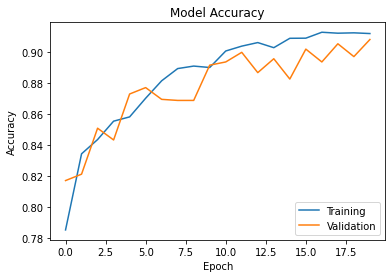

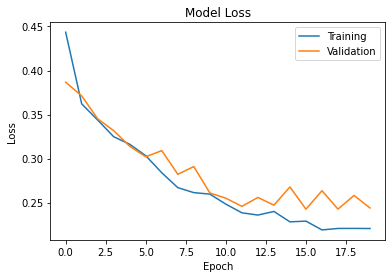

In [7]:
fig1, ax_acc = plt.subplots()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show()

fig2, ax_loss = plt.subplots()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training', 'Validation'], loc='upper right')


plt.show()
    


In [8]:
model.save("MLP_PTB")

INFO:tensorflow:Assets written to: MLP_PTB\assets
